In [1]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from torch.nn.parameter import Parameter

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

from smt.sampling_methods import LHS
from scipy.io import savemat

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

device = torch.device('cpu')

print(device)

if device == 'cuda': 
    print(torch.cuda.get_device_name())

cpu


In [2]:
class Sequentialmodel_stan(nn.Module):
    
    def __init__(self,layers):
        super().__init__() #call __init__ from parent class 
              
    
        self.activation = nn.Tanh()
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        
        # std = gain * sqrt(2/(input_dim+output_dim))
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data) 
        
        self.beta = Parameter(torch.ones((50,len(layers)-2)))
        self.beta.requiresGrad = True
        
        self.iter = 0
        
              
    'forward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = 2.0*(x - l_b)/(u_b - l_b) - 1.0 #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(z) + self.beta[:,i]*z*self.activation(z)
            
        a = self.linears[-1](a) 
         
        return a
    
#-----------------------------------------------------------------------------------
class Sequentialmodel_tanh(nn.Module):
    
    def __init__(self,layers):
        super().__init__() #call __init__ from parent class 
              
    
        self.activation = nn.Tanh()
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        
        # std = gain * sqrt(2/(input_dim+output_dim))
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data) 
             
      
              
    'forward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = 2.0*(x - l_b)/(u_b - l_b) - 1.0 #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(z) 
            
        a = self.linears[-1](a) 
         
        return a
    
#---------------------------------------------------------------------------
class Sequentialmodel_atanh(nn.Module):
    
    def __init__(self,layers,n_val):
        super().__init__() #call __init__ from parent class 
              
    
        self.activation = nn.Tanh()
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        
        # std = gain * sqrt(2/(input_dim+output_dim))
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data) 
        
        self.alpha = Parameter(torch.ones((50,len(layers)-2)))
        self.alpha.requiresGrad = True
        
        self.n = torch.tensor(n_val)
        
              
    'forward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = (x - l_b)/(u_b - l_b) #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(self.n*self.alpha[:,i]*z)
            
        a = self.linears[-1](a) 
         
        return a
#--------------------------------------------------------------------------------------------
class Sequentialmodel_swish(nn.Module):
    
    def __init__(self,layers):
        super().__init__() #call __init__ from parent class 
              
    
        self.activation = nn.Sigmoid()
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        
        # std = gain * sqrt(2/(input_dim+output_dim))
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data) 
        
        self.beta = Parameter(torch.ones((50,len(layers)-2)))
        self.beta.requiresGrad = True
        
              
    'forward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = (x - l_b)/(u_b - l_b) #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = z*self.activation(self.beta[:,i]*z)
            
        a = self.linears[-1](a) 
         
        return a

#--------------------------------------------------------------------------------------
class Sequentialmodel_rowdy(nn.Module):
    
    def __init__(self,layers,n_val,rowdy_terms):
        super().__init__() #call __init__ from parent class 
              
    
        self.activation = nn.Tanh()
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        
        # std = gain * sqrt(2/(input_dim+output_dim))
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data) 
        
        self.omega1 = Parameter(torch.ones((len(layers)-2,1))) 
        self.omega1.requiresGrad = True
        
        
        self.alpha = Parameter(torch.zeros(rowdy_terms,len(layers)-2))
        self.alpha.requiresGrad = True
        
        self.omega = Parameter((1/n_val)*torch.ones(rowdy_terms,len(layers)-2))
        self.omega.requiresGrad = True
        
        self.n = torch.tensor(n_val)

                      
    'forward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = 2.0*(x - l_b)/(u_b - l_b)-1.0 #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(self.omega1[i,0]*z)
            for j in range(rowdy_terms):
                a = a + self.alpha[j,i]*self.n*torch.sin((j+1)*self.n*self.omega[j,i]*z)
            
        a = self.linears[-1](a) 
         
        return a

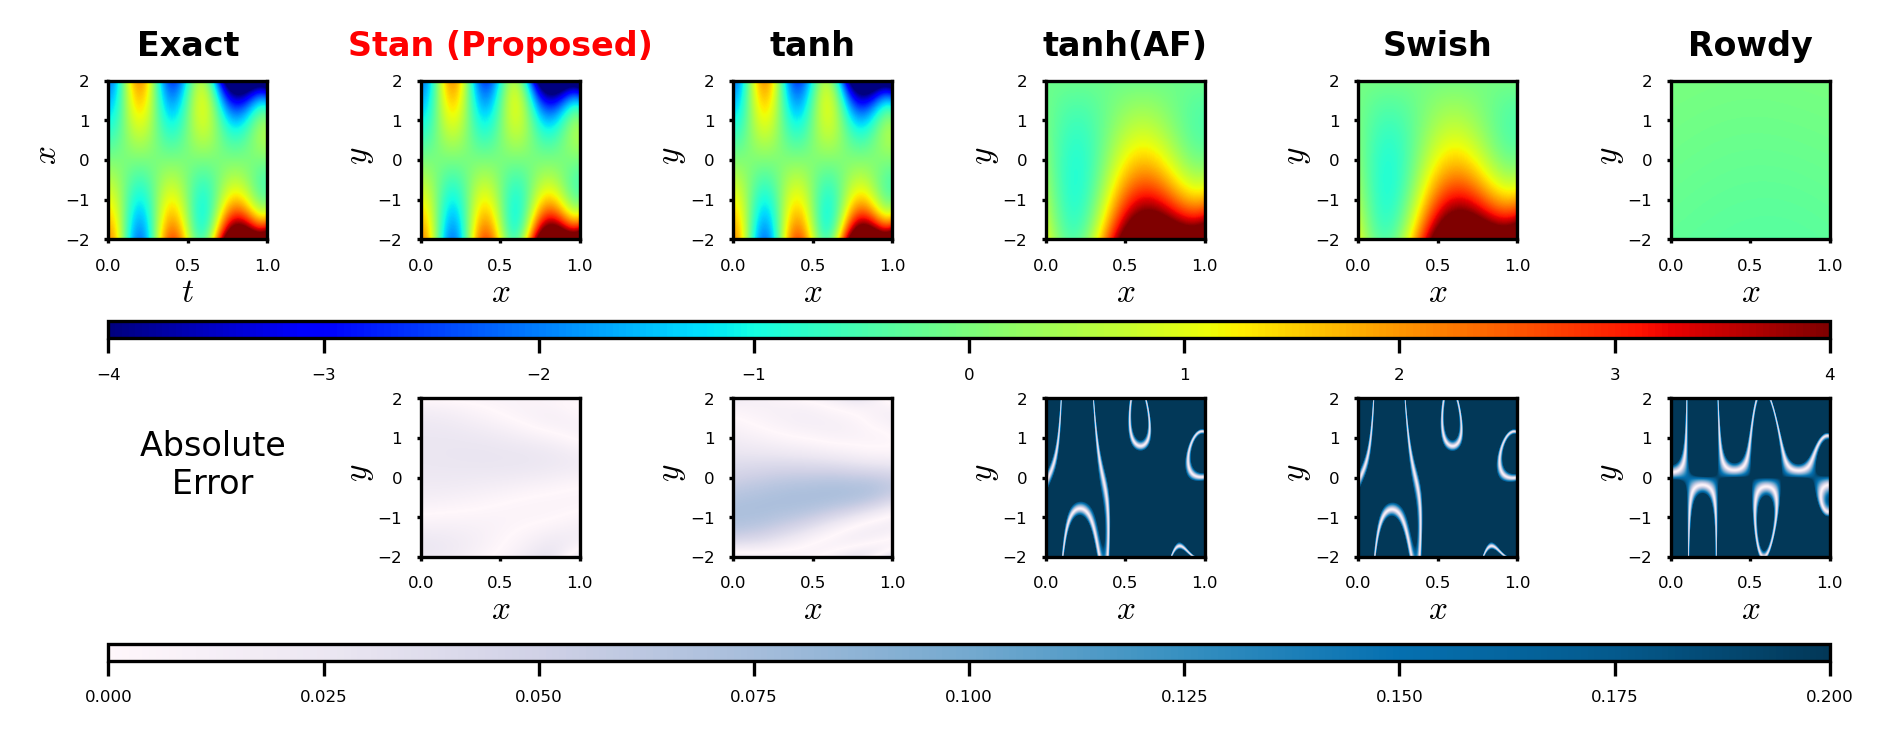

In [4]:
fig, axs = plt.subplots(2,6)
cmap = plt.cm.jet

level_ind = 2

levels = ["low","medium","high"]
level = levels[level_ind]

extents = [[0,1,0,1],[0,1,0,2],[0,1,-2,2]]
extent = extents[level_ind]

rep_num = 2

pi = np.pi

loss_thresh = 0.1
label = "KG_stan_" + level

def true_2D_1(xt): #True function for 2D_1 Klein Gordon Equation x \in [-50,50] , t \in [0,10]
    x = xt[:,0].reshape(-1,1)
    t = xt[:,1].reshape(-1,1)
    y = x*np.cos(5*np.pi*t) + np.power(x*t,3)
    return y.reshape(-1,1)    

x = np.linspace(extent[2],extent[3],500).reshape(-1,1)
t = np.linspace(0,1,500).reshape(-1,1)

X,T = np.meshgrid(x,t)

X = X.flatten('F').reshape(-1,1)
T = T.flatten('F').reshape(-1,1)
  
xt = np.hstack((X,T))

u_true = true_2D_1(xt)


xt_test_tensor = torch.from_numpy(xt).float().to(device)


lb = xt[0]
ub = xt[-1]


fig.dpi=300
fig.tight_layout()

layers = np.array([2,50,50,50,50,1])#9 hidden layers
folder_names = ['./stan/','./tanh/','./atanh/','./swish/','./rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
prob_name = "KG_"
# plt_titles = ['Stan (Proposed)','tanh']


rowdy_terms = 6

PINNs = [Sequentialmodel_stan(layers),Sequentialmodel_tanh(layers),Sequentialmodel_atanh(layers,1.0),Sequentialmodel_swish(layers),Sequentialmodel_rowdy(layers,1.0,rowdy_terms)] 


img1 = axs[0,0].imshow(u_true.reshape(500,500),vmin = -4,vmax = 4,cmap = cmap,extent=extent,aspect = 1/4)

    

axs[1,0].set_aspect(aspect = 1)
axs[1,0].axis('off')
axs[1,0].text(0.2,0.4,"Absolute \n   Error",fontsize=8)

for i in range(5):
    PINNs[i].load_state_dict(torch.load(folder_names[i]+prob_name + algo_names[i] + '_' + level+'_'+str(rep_num)+'.pt'))

    u_pred = PINNs[i].forward(xt_test_tensor).cpu().detach().numpy()
    
     

    
    img = axs[0,i+1].imshow(u_pred.reshape(500,500),vmin = -4,vmax = 4,cmap = cmap,extent=extent,aspect = 1/4) 
    axs[0,i+1].set_xlabel('$x$', fontsize=8, math_fontfamily='cm', labelpad=0.5)
    axs[0,i+1].set_ylabel(' $y$',fontsize=8, math_fontfamily='cm', labelpad=0.5)
    axs[0,i+1].tick_params(axis='x', labelsize=4,length = 1)
    axs[0,i+1].tick_params(axis='y', labelsize=4,length = 1)
    
    img = axs[1,i+1].imshow(np.abs(u_pred-u_true).reshape(500,500),vmin = 0,vmax =0.2,cmap = plt.cm.PuBu,extent=extent,aspect = 1/4)
    axs[1,i+1].set_xlabel('$x$', fontsize=8, math_fontfamily='cm', labelpad=0.5)
    axs[1,i+1].set_ylabel(' $y$',fontsize=8, math_fontfamily='cm', labelpad=0.5)
    axs[1,i+1].tick_params(axis='x', labelsize=4,length = 1)
    axs[1,i+1].tick_params(axis='y', labelsize=4,length = 1)
    # cbar = fig.colorbar(img, ax=axs[i,2])
    # cbar.ax.tick_params(labelsize=4,labelbottom = True,labeltop = False, bottom =True, top = False) 
    
    # for j in range(3):
    #     axs[i,j].set_xlabel('$t$', fontsize=8, math_fontfamily='cm', labelpad=0.0)
    #     axs[i,j].set_ylabel(' $x$',fontsize=8, math_fontfamily='cm', labelpad=0.0)
    #     axs[i,j].tick_params(labelsize=6)
    
cbar = fig.colorbar(img, ax=axs,location = 'bottom',orientation = 'horizontal', aspect = 100,panchor = (0,-1.5))
cbar.ax.tick_params(labelsize=4,labelbottom = True,labeltop = False, bottom =True, top = False) 
axs[1,1].set_xlabel('$x$', fontsize=8, math_fontfamily='cm', labelpad=0.5)
axs[1,1].set_ylabel(' $y$',fontsize=8, math_fontfamily='cm', labelpad=0.5)
axs[1,1].tick_params(axis='x', labelsize=4,length = 1)
axs[1,1].tick_params(axis='y', labelsize=4,length = 1)


cbar = fig.colorbar(img1, ax=axs,location = 'bottom',orientation = 'horizontal', aspect = 100, panchor = (0,-4.75))
cbar.ax.tick_params(labelsize=4,labelbottom = True,labeltop = False, bottom =True, top = False) 
axs[0,0].set_xlabel('$t$', fontsize=8, math_fontfamily='cm', labelpad=0.5)
axs[0,0].set_ylabel(' $x$',fontsize=8, math_fontfamily='cm', labelpad=0.5)
axs[0,0].tick_params(axis='x', labelsize=4,length = 1)
axs[0,0].tick_params(axis='y', labelsize=4,length = 1)

fig.subplots_adjust(top = 1.0,bottom = 0.6)

plt_titles = ['Exact','Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']
for i in range(6):
    if(i==1):
        axs[0,i].set_title(plt_titles[i],fontsize=8, math_fontfamily='cm',color = 'r',fontweight='extra bold')
    else:
        axs[0,i].set_title(plt_titles[i],fontsize=8, math_fontfamily='cm',fontweight='extra bold')
    
# plt.savefig('KG_'+level +'_pred_error.png', format='png',pad_inches=0, bbox_inches='tight',transparent=True)    
# plt.savefig('KG_'+level +'_pred_error.pdf', format='pdf',pad_inches=0, bbox_inches='tight',transparent=True)
plt.savefig('FSU_KG_'+level +'_pred_error.svg', format='svg',pad_inches=0, bbox_inches='tight',transparent=True)

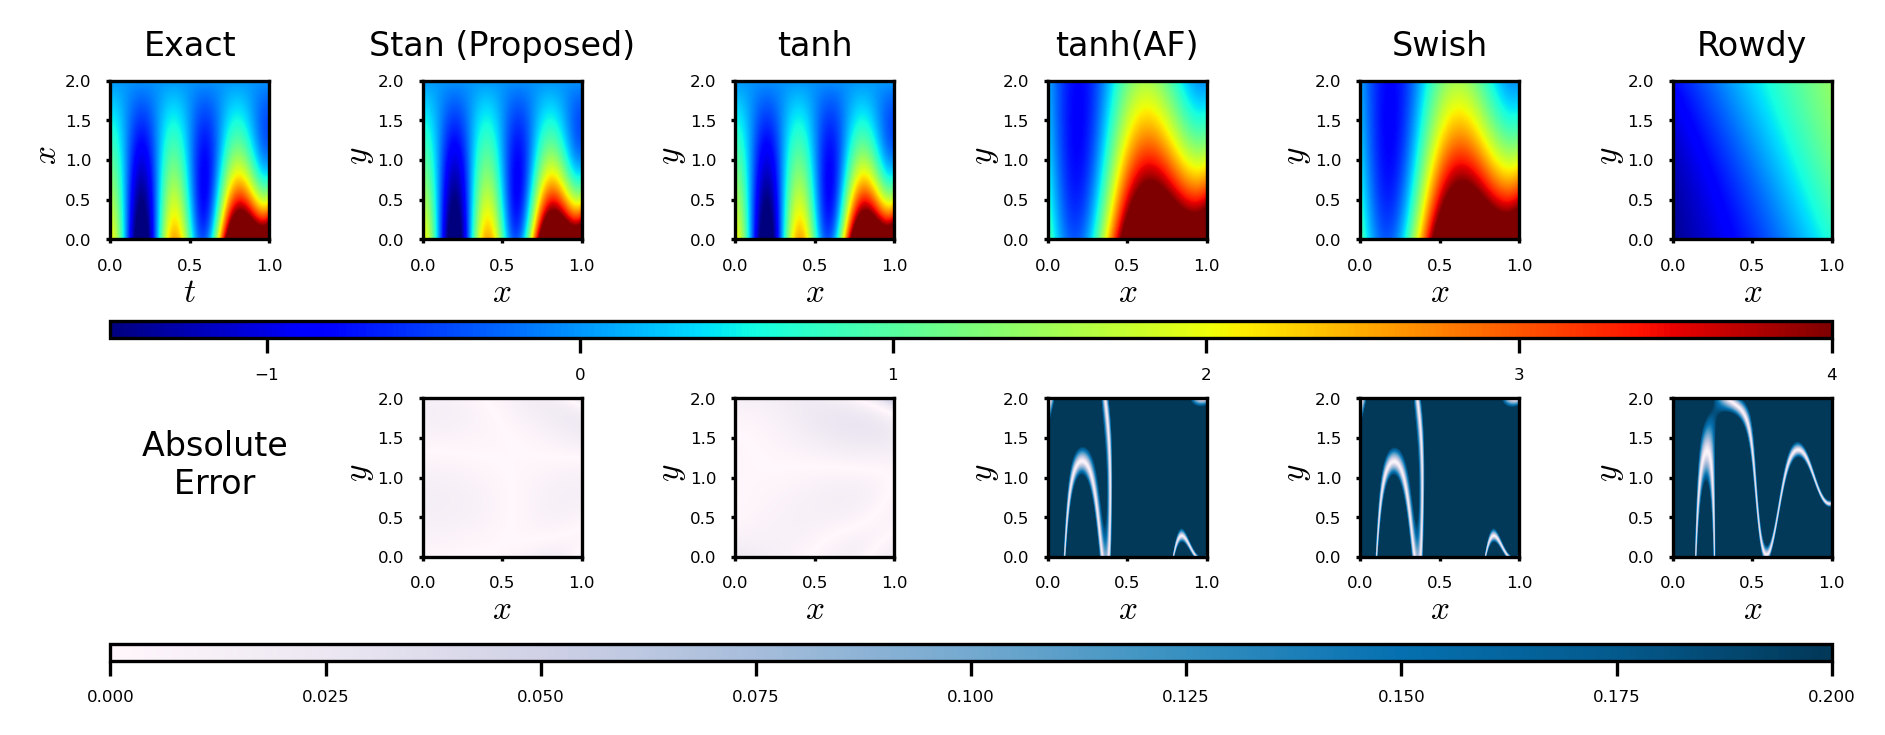

In [6]:
fig, axs = plt.subplots(2,6)
cmap = plt.cm.jet

level_ind = 1

levels = ["low","medium","high"]
level = levels[level_ind]

extents = [[0,1,0,1],[0,1,0,2],[0,1,-2,2]]
extent = extents[level_ind]

rep_num = 2

pi = np.pi

loss_thresh = 0.1
label = "KG_stan_" + level

def true_2D_1(xt): #True function for 2D_1 Klein Gordon Equation x \in [-50,50] , t \in [0,10]
    x = xt[:,0].reshape(-1,1)
    t = xt[:,1].reshape(-1,1)
    y = x*np.cos(5*np.pi*t) + np.power(x*t,3)
    return y.reshape(-1,1)    

x = np.linspace(extent[2],extent[3],500).reshape(-1,1)
t = np.linspace(0,1,500).reshape(-1,1)

X,T = np.meshgrid(x,t)

X = X.flatten('F').reshape(-1,1)
T = T.flatten('F').reshape(-1,1)
  
xt = np.hstack((X,T))

u_true = true_2D_1(xt)


xt_test_tensor = torch.from_numpy(xt).float().to(device)


lb = xt[0]
ub = xt[-1]


fig.dpi=300
fig.tight_layout()

layers = np.array([2,50,50,50,50,1])#9 hidden layers
folder_names = ['./stan/','./tanh/','./atanh/','./swish/','./rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
prob_name = "KG_"
# plt_titles = ['Stan (Proposed)','tanh']


rowdy_terms = 6

PINNs = [Sequentialmodel_stan(layers),Sequentialmodel_tanh(layers),Sequentialmodel_atanh(layers,1.0),Sequentialmodel_swish(layers),Sequentialmodel_rowdy(layers,1.0,rowdy_terms)] 


img1 = axs[0,0].imshow(u_true.reshape(500,500),vmin = -1.5,vmax = 4,cmap = cmap,extent=extent,aspect = 1/2)

    

axs[1,0].set_aspect(aspect = 1)
axs[1,0].axis('off')
axs[1,0].text(0.2,0.4,"Absolute \n   Error",fontsize=8)

for i in range(5):
    PINNs[i].load_state_dict(torch.load(folder_names[i]+prob_name + algo_names[i] + '_' + level+'_'+str(rep_num)+'.pt'))

    u_pred = PINNs[i].forward(xt_test_tensor).cpu().detach().numpy()
    
     

    
    img = axs[0,i+1].imshow(u_pred.reshape(500,500),vmin = -1.5,vmax = 4,cmap = cmap,extent=extent,aspect = 1/2) 
    axs[0,i+1].set_xlabel('$x$', fontsize=8, math_fontfamily='cm', labelpad=0.5)
    axs[0,i+1].set_ylabel(' $y$',fontsize=8, math_fontfamily='cm', labelpad=0.5)
    axs[0,i+1].tick_params(axis='x', labelsize=4,length = 1)
    axs[0,i+1].tick_params(axis='y', labelsize=4,length = 1)
    
    img = axs[1,i+1].imshow(np.abs(u_pred-u_true).reshape(500,500),vmin = 0,vmax =0.2,cmap = plt.cm.PuBu,extent=extent,aspect = 1/2)
    axs[1,i+1].set_xlabel('$x$', fontsize=8, math_fontfamily='cm', labelpad=0.5)
    axs[1,i+1].set_ylabel(' $y$',fontsize=8, math_fontfamily='cm', labelpad=0.5)
    axs[1,i+1].tick_params(axis='x', labelsize=4,length = 1)
    axs[1,i+1].tick_params(axis='y', labelsize=4,length = 1)
    # cbar = fig.colorbar(img, ax=axs[i,2])
    # cbar.ax.tick_params(labelsize=4,labelbottom = True,labeltop = False, bottom =True, top = False) 
    
    # for j in range(3):
    #     axs[i,j].set_xlabel('$t$', fontsize=8, math_fontfamily='cm', labelpad=0.0)
    #     axs[i,j].set_ylabel(' $x$',fontsize=8, math_fontfamily='cm', labelpad=0.0)
    #     axs[i,j].tick_params(labelsize=6)
    
cbar = fig.colorbar(img, ax=axs,location = 'bottom',orientation = 'horizontal', aspect = 100,panchor = (0,-1.5))
cbar.ax.tick_params(labelsize=4,labelbottom = True,labeltop = False, bottom =True, top = False) 
axs[1,1].set_xlabel('$x$', fontsize=8, math_fontfamily='cm', labelpad=0.5)
axs[1,1].set_ylabel(' $y$',fontsize=8, math_fontfamily='cm', labelpad=0.5)
axs[1,1].tick_params(axis='x', labelsize=4,length = 1)
axs[1,1].tick_params(axis='y', labelsize=4,length = 1)


cbar = fig.colorbar(img1, ax=axs,location = 'bottom',orientation = 'horizontal', aspect = 100, panchor = (0,-4.75))
cbar.ax.tick_params(labelsize=4,labelbottom = True,labeltop = False, bottom =True, top = False) 
axs[0,0].set_xlabel('$t$', fontsize=8, math_fontfamily='cm', labelpad=0.5)
axs[0,0].set_ylabel(' $x$',fontsize=8, math_fontfamily='cm', labelpad=0.5)
axs[0,0].tick_params(axis='x', labelsize=4,length = 1)
axs[0,0].tick_params(axis='y', labelsize=4,length = 1)

fig.subplots_adjust(top = 1.0,bottom = 0.6)

plt_titles = ['Exact','Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']
for i in range(6):
    axs[0,i].set_title(plt_titles[i],fontsize=8, math_fontfamily='cm')
    
plt.savefig('KG_'+level +'_pred_error.pdf', format='pdf',pad_inches=0, bbox_inches='tight',transparent=True)

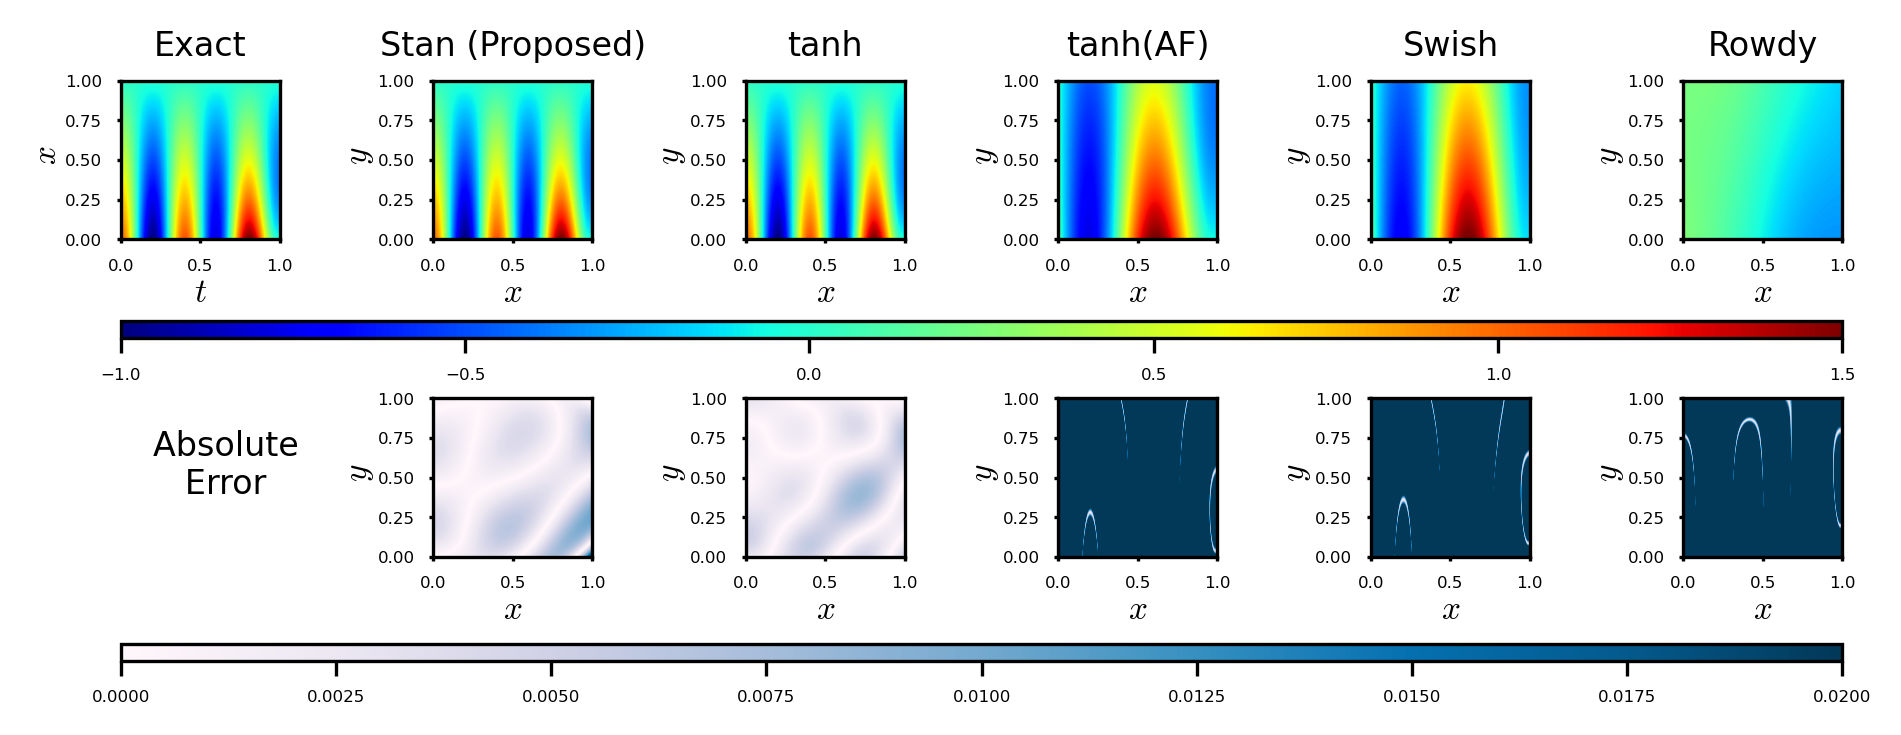

In [ ]:
fig, axs = plt.subplots(2,6)
cmap = plt.cm.jet

level_ind = 0

levels = ["low","medium","high"]
level = levels[level_ind]

extents = [[0,1,0,1],[0,1,0,2],[0,1,-2,2]]
extent = extents[level_ind]

rep_num = 2

pi = np.pi

loss_thresh = 0.1
label = "KG_stan_" + level

def true_2D_1(xt): #True function for 2D_1 Klein Gordon Equation x \in [-50,50] , t \in [0,10]
    x = xt[:,0].reshape(-1,1)
    t = xt[:,1].reshape(-1,1)
    y = x*np.cos(5*np.pi*t) + np.power(x*t,3)
    return y.reshape(-1,1)    

x = np.linspace(extent[2],extent[3],500).reshape(-1,1)
t = np.linspace(0,1,500).reshape(-1,1)

X,T = np.meshgrid(x,t)

X = X.flatten('F').reshape(-1,1)
T = T.flatten('F').reshape(-1,1)
  
xt = np.hstack((X,T))

u_true = true_2D_1(xt)


xt_test_tensor = torch.from_numpy(xt).float().to(device)


lb = xt[0]
ub = xt[-1]


fig.dpi=300
fig.tight_layout()

layers = np.array([2,50,50,50,50,1])#9 hidden layers
folder_names = ['./stan/','./tanh/','./atanh/','./swish/','./rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
prob_name = "KG_"
# plt_titles = ['Stan (Proposed)','tanh']


rowdy_terms = 6

PINNs = [Sequentialmodel_stan(layers),Sequentialmodel_tanh(layers),Sequentialmodel_atanh(layers,1.0),Sequentialmodel_swish(layers),Sequentialmodel_rowdy(layers,1.0,rowdy_terms)] 


img1 = axs[0,0].imshow(u_true.reshape(500,500),vmin = -1,vmax = 1.5,cmap = cmap,extent=extent,aspect = 1)

    

axs[1,0].set_aspect(aspect = 1)
axs[1,0].axis('off')
axs[1,0].text(0.2,0.4,"Absolute \n   Error",fontsize=8)

for i in range(5):
    PINNs[i].load_state_dict(torch.load(folder_names[i]+prob_name + algo_names[i] + '_' + level+'_'+str(rep_num)+'.pt'))

    u_pred = PINNs[i].forward(xt_test_tensor).cpu().detach().numpy()
    
     

    
    img = axs[0,i+1].imshow(u_pred.reshape(500,500),vmin = -1,vmax = 1.5,cmap = cmap,extent=extent,aspect = 1) 
    axs[0,i+1].set_xlabel('$x$', fontsize=8, math_fontfamily='cm', labelpad=0.5)
    axs[0,i+1].set_ylabel(' $y$',fontsize=8, math_fontfamily='cm', labelpad=0.5)
    axs[0,i+1].tick_params(axis='x', labelsize=4,length = 1)
    axs[0,i+1].tick_params(axis='y', labelsize=4,length = 1)
    
    img = axs[1,i+1].imshow(np.abs(u_pred-u_true).reshape(500,500),vmin = 0,vmax =0.02,cmap = plt.cm.PuBu,extent=extent,aspect = 1)
    axs[1,i+1].set_xlabel('$x$', fontsize=8, math_fontfamily='cm', labelpad=0.5)
    axs[1,i+1].set_ylabel(' $y$',fontsize=8, math_fontfamily='cm', labelpad=0.5)
    axs[1,i+1].tick_params(axis='x', labelsize=4,length = 1)
    axs[1,i+1].tick_params(axis='y', labelsize=4,length = 1)
    # cbar = fig.colorbar(img, ax=axs[i,2])
    # cbar.ax.tick_params(labelsize=4,labelbottom = True,labeltop = False, bottom =True, top = False) 
    
    # for j in range(3):
    #     axs[i,j].set_xlabel('$t$', fontsize=8, math_fontfamily='cm', labelpad=0.0)
    #     axs[i,j].set_ylabel(' $x$',fontsize=8, math_fontfamily='cm', labelpad=0.0)
    #     axs[i,j].tick_params(labelsize=6)
    
cbar = fig.colorbar(img, ax=axs,location = 'bottom',orientation = 'horizontal', aspect = 100,panchor = (0,-1.5))
cbar.ax.tick_params(labelsize=4,labelbottom = True,labeltop = False, bottom =True, top = False) 
axs[1,1].set_xlabel('$x$', fontsize=8, math_fontfamily='cm', labelpad=0.5)
axs[1,1].set_ylabel(' $y$',fontsize=8, math_fontfamily='cm', labelpad=0.5)
axs[1,1].tick_params(axis='x', labelsize=4,length = 1)
axs[1,1].tick_params(axis='y', labelsize=4,length = 1)


cbar = fig.colorbar(img1, ax=axs,location = 'bottom',orientation = 'horizontal', aspect = 100, panchor = (0,-4.75))
cbar.ax.tick_params(labelsize=4,labelbottom = True,labeltop = False, bottom =True, top = False) 
axs[0,0].set_xlabel('$t$', fontsize=8, math_fontfamily='cm', labelpad=0.5)
axs[0,0].set_ylabel(' $x$',fontsize=8, math_fontfamily='cm', labelpad=0.5)
axs[0,0].tick_params(axis='x', labelsize=4,length = 1)
axs[0,0].tick_params(axis='y', labelsize=4,length = 1)

fig.subplots_adjust(top = 1.0,bottom = 0.6)

plt_titles = ['Exact','Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']
for i in range(6):
    axs[0,i].set_title(plt_titles[i],fontsize=8, math_fontfamily='cm')
    
plt.savefig('KG_'+level +'_pred_error.pdf', format='pdf',pad_inches=0, bbox_inches='tight',transparent=True)

In [256]:
np.min(u_true)

-0.9919319890203949